In [31]:
import json
import matplotlib.pyplot as plt
import operator
import os


In [32]:
def get_mentions_of_cluster(dataset, cluster_id):
    mentions = []
    for mention in dataset:
        if mention['coref_chain'] == cluster_id:
            mentions.append(mention)

    return mentions


def get_all_chains(mentions):
    clusters = {}
    for mention_dic in mentions:
        chain = mention_dic['coref_chain']
        clusters[chain] = [] if chain not in clusters else clusters[chain]
        clusters[chain].append(mention_dic)

    return clusters


def get_cluster_by_mention_num(clusters, num):
    clusters_names = []
    for cluster, doc_mention in clusters.items():
        num_of_mentions = len(doc_mention)
        if num_of_mentions == num:
            clusters_names.append(cluster)

    return clusters_names


def get_gold_within_doc(mentions):
    wd_cluster = {}
    for mention in mentions:
        chain = mention['coref_chain']
        doc = mention['doc_id']
        id_within_doc = chain + '_' + doc
        wd_cluster[id_within_doc] = [] if id_within_doc not in wd_cluster else wd_cluster[id_within_doc]
        wd_cluster[id_within_doc].append(mention)

    return wd_cluster


def get_metainfo(clusters):
    dic = {}
    for cluster, doc_mention in clusters.items():
        num_of_mentions = len(doc_mention)
        dic[num_of_mentions] = dic.get(num_of_mentions, 0) + 1

    for length, num_of_clusters in sorted(dic.items()):
        print(f"There are {num_of_clusters} clusters with {length} mentions")

    number = dic.values()
    labels = dic.keys()

    get_pie_chart(number, labels)


def extract_mention_text(cluster):
    mentions = []
    for mention in cluster:
        mention.append(mention['MENTION_TEXT'])
    return mentions


def get_pie_chart(values, labels):
    patches, texts = plt.pie(values, shadow=True, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.show()


def within_to_cross(within_doc_cluster):
    cross_doc = {}
    for within in within_doc_cluster:
        name = within.split('_')[0]
        if name != 'INTRA' and name != 'Singleton':
            cross_doc[name] = [] if name not in cross_doc else cross_doc[name]
            cross_doc[name].append(within)

    return cross_doc


def find_most_popular_word(clusters, within_doc_cluster):
    words = {}
    for cluster in clusters:
        mentions = within_doc_cluster[cluster]
        vocab = set()
        for mention in mentions:
            text = mention['MENTION_TEXT']
            vocab.add(text)

        for word in vocab:
            words[word] = words.get(word, 0) + 1

    most_word = max(words.items(), key=operator.itemgetter(1))
    return most_word[0], most_word[1]/len(clusters)


def get_prob(within_doc_cluster):
    cross_doc = within_to_cross(within_doc_cluster)
    length = 0
    prob = 0
    for cluster, within in cross_doc.items():
        word, coverage = find_most_popular_word(within, within_doc_cluster)
        length += len(within)
        prob += coverage * len(within)

    return prob / length


In [33]:
OUTPUT_DIR = './data/ecbPlusOut/'


In [34]:
with open(os.path.join(OUTPUT_DIR + '/entity_gold_mentions.json'), 'r') as f:
    entity_mentions = json.load(f)

with open(os.path.join(OUTPUT_DIR + '/event_gold_mentions.json'), 'r') as f:
    event_mentions = json.load(f)


print(f'{len(entity_mentions)} entity mentions')
print(f'{len(event_mentions)} event mentions')


17294 entity mentions
15003 event mentions


In [35]:
event_cross_clusters = get_all_chains(event_mentions)
event_within_clusters = get_gold_within_doc(event_mentions)
entity_cross_clusters = get_all_chains(entity_mentions)
entity_within_clusters = get_gold_within_doc(entity_mentions)
print(f'Number of entity chains: {len(entity_cross_clusters)}')
print(f'Number of event chains: {len(event_cross_clusters)}')

Number of entity chains: 7657
Number of event chains: 8877


In [36]:
entity_singleton = sum([1 for m in entity_mentions if m["coref_chain"].startswith('Singleton')])
event_singleton = sum([1 for m in event_mentions if m["coref_chain"].startswith('Singleton')])
print(f'Number of entity singleton: {format(entity_singleton)}')
print(f'Number of event singleton: {format(event_singleton)}')


Number of entity singleton: 6429
Number of event singleton: 7603


In [37]:
print(f'Event Cross chains: {len(event_cross_clusters)}')
print(f'Event Within chains: {len(event_within_clusters)}')

print(f'Entity Cross chains: {len(entity_cross_clusters)}')
print(f'Entity Within chains: {len(entity_within_clusters)}')


Event Cross chains: 8877
Event Within chains: 12612
Entity Cross chains: 7657
Entity Within chains: 12253


There are 11121 clusters with 1 mentions
There are 956 clusters with 2 mentions
There are 344 clusters with 3 mentions
There are 114 clusters with 4 mentions
There are 41 clusters with 5 mentions
There are 12 clusters with 6 mentions
There are 10 clusters with 7 mentions
There are 5 clusters with 8 mentions
There are 2 clusters with 9 mentions
There are 2 clusters with 10 mentions
There are 3 clusters with 11 mentions
There are 2 clusters with 12 mentions


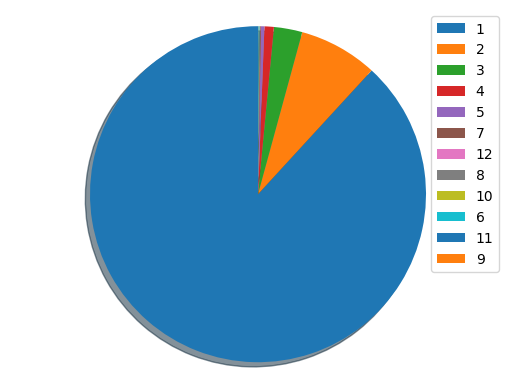

In [38]:
get_metainfo(event_within_clusters)


In [39]:
get_cluster_by_mention_num(event_within_clusters, 4)


['ACT16976684395747580_DOC15651941801839163',
 'ACT16976828207985668_DOC15651941801839163',
 'ACT16976684395747580_DOC15651942691066497',
 'ACT17042077747908144_DOC15652008263279071',
 'ACT17042077747908144_DOC15652008114776924',
 'ACT16979225864150215_DOC15655038787313229',
 'ACT16979267820424588_DOC15655038787313229',
 'ACT16979013736492808_DOC15652009005943630',
 'ACT17642853147528564_DOC15655331714634859',
 'ACT17642853147528564_DOC15655331614039199',
 'ACT28674653653685646_DOC15652435922795910',
 'ACT17479136632367144_DOC15646216054143084',
 'INTRA_25053_DOC15646216693198082_DOC15646216693198082',
 'ACT17733054001869323_DOC15646259694118175',
 'ACT17733054001869323_DOC15646258830821413',
 'ACT17733054001869323_DOC15646259324410963',
 'ACT17818055305739959_DOC15646259324410963',
 'ACT17734003472118220_DOC15646259030729705',
 'ACT16958629132224286_DOC15646086832712158',
 'ACT16959854586023994_DOC15646086631246634',
 'ACT16958170637145285_DOC15646086326139393',
 'ACT27398642960429027

In [40]:
cross_keys = set()
for cluster, mentions in event_cross_clusters.items():
    doc = mentions[0]['doc_id']
    for m in mentions[1:]:
        if m['doc_id'] != doc:
            cross_keys.add(m['coref_chain'])
len(cross_keys)


881